# Case Study - Leads Scoring for X Education


##### Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.



The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


##### Goals of the Case Study

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler

In [2]:
#importing the leads dataset

leads=pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
leads.shape

(9240, 37)

In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### EXPLORATORY DATA ANALYSIS
### Data understanding, preparation

In [6]:
#check for duplicates

sum(leads.duplicated(subset = 'Prospect ID')) == 0
sum(leads.duplicated(subset = 'Lead Number')) == 0

True

No duplicate values found in Prospect ID & Lead Number

Prospect ID & Lead Number are unique numbers and it is not required for the analysis.

In [7]:
#dropping Lead Number and Prospect ID since they have all unique values

leads.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)

In [8]:
#Converting 'Select' values to NaN.

leads = leads.replace('Select', np.nan)

In [9]:
#checking percentage of null values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [10]:
# 'Lead profile' is an important variable and should not be dropped. Checking the value_counts :
leads['Lead Profile'].value_counts(dropna=False)

Lead Profile
NaN                            6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [11]:
# Impute the missing values with 'Unknown'
leads['Lead Profile'] = leads['Lead Profile'].replace(np.nan,'Unknown')

In [12]:
leads['Lead Profile'].value_counts(dropna=False)

Lead Profile
Unknown                        6855
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: count, dtype: int64

In [13]:
# 'Lead Quality' is an important variable and should not be dropped. Checking the value_counts :
leads['Lead Quality'].value_counts(dropna=False)

Lead Quality
NaN                  4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [14]:
# Impute the missing values with 'Unknown'
leads['Lead Quality'] = leads['Lead Quality'].replace(np.nan,'Unknown')

In [15]:
leads['Lead Quality'].value_counts(dropna=False)

Lead Quality
Unknown              4767
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [16]:
# There are 4 columns starting with 'Asymmetrique' and with exactly same % of missing values.  
# Since the pattern is same for all the 4 columns, we will maintain one of them and drop the remaining columns.
# Replacing missing values with 'Unknown' in 'Asymmetrique Activity Index' column:
leads['Asymmetrique Activity Index'] = leads['Asymmetrique Activity Index'].replace(np.nan,'Unknown')

In [17]:
#checking percentage of null values in each column

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [18]:
#dropping cols with more than 45% missing values

cols=leads.columns

for i in cols:
    if((100*(leads[i].isnull().sum()/len(leads.index))) >= 45):
        leads.drop(i, axis=1, inplace = True)

In [19]:
leads.shape

(9240, 31)

In [20]:
#checking null values percentage after dropping 45%

round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

##### Categorical Attributes Analysis:

In [21]:
#checking value counts of Country column

leads['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

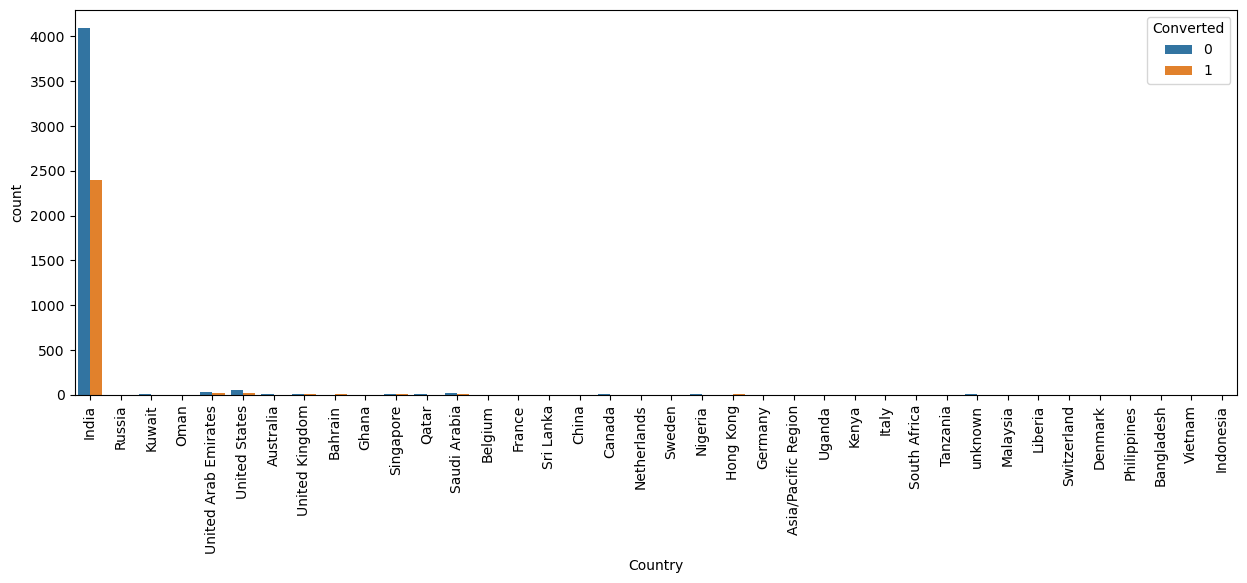

In [22]:
# plotting spread of Country column
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=leads, x='Country', hue='Converted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

As we can see the Number of Values for India are quite high . However, this an important data. Imputing missing values with 'Unknown' :

##### As we proceed, we will identify the columns to be dropped. Hence a list of columns to be deleted needs to be created.

In [23]:
#creating a list of columns to be droppped :

cols_to_drop=[]

##### Handling missing values in 'Country' column :

In [24]:
# Relacing NaN with Unknown in 'COuntry' column :

In [25]:
leads['Country'] = leads['Country'].replace(np.nan,'Unknown')

In [26]:
Country_counts = leads['Country'].value_counts()
# Identify countries with low frequency (less than 10)
low_freq_countries = Country_counts[Country_counts < 25].index
low_freq_countries

Index(['Singapore', 'Saudi Arabia', 'United Kingdom', 'Australia', 'Qatar',
       'Bahrain', 'Hong Kong', 'Oman', 'France', 'unknown', 'Kuwait',
       'South Africa', 'Canada', 'Nigeria', 'Germany', 'Sweden', 'Philippines',
       'Uganda', 'Italy', 'Bangladesh', 'Netherlands', 'Asia/Pacific Region',
       'China', 'Belgium', 'Ghana', 'Kenya', 'Sri Lanka', 'Tanzania',
       'Malaysia', 'Liberia', 'Switzerland', 'Denmark', 'Russia', 'Vietnam',
       'Indonesia'],
      dtype='object', name='Country')

In [27]:
# Replace low frequency countries with 'Others'
leads['Country'] = leads['Country'].apply(lambda x: 'Others' if x in low_freq_countries else x)

In [28]:
#checking value counts of Country column after changes :

leads['Country'].value_counts(dropna=False)

Country
India                   6492
Unknown                 2461
Others                   165
United States             69
United Arab Emirates      53
Name: count, dtype: int64

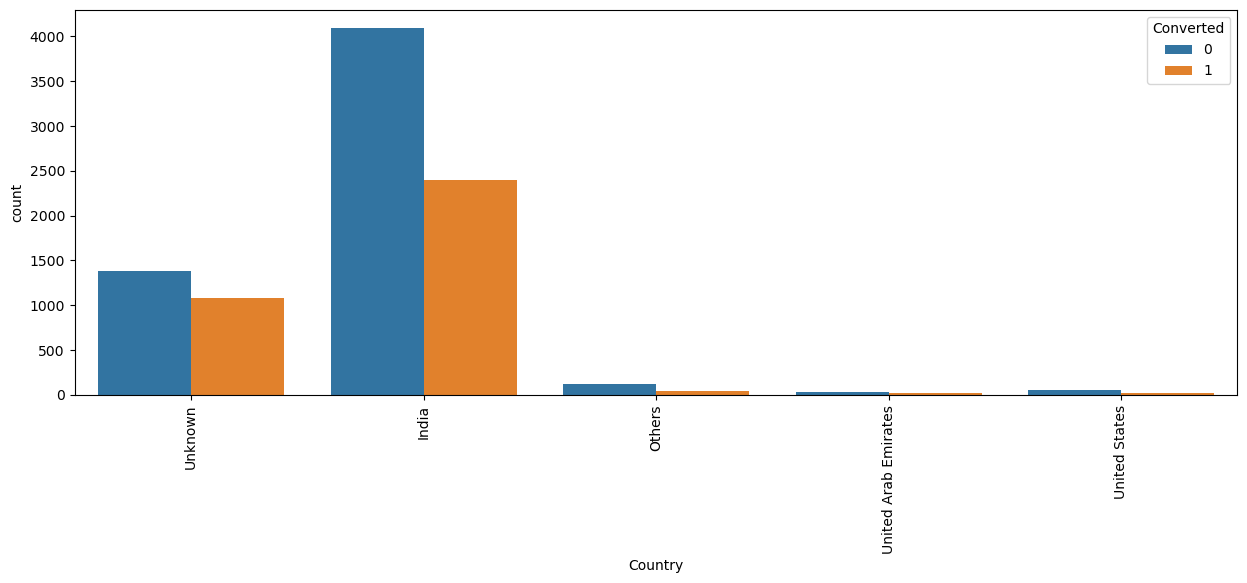

In [29]:
# plotting spread of Country column
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=leads, x='Country', hue='Converted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [30]:
#checking value counts of "City" column

leads['City'].value_counts(dropna=False)

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [31]:
# Replacing NaN with 'Unspecified' in 'City' Column :
leads['City'] = leads['City'].replace(np.nan,'Unspecified')

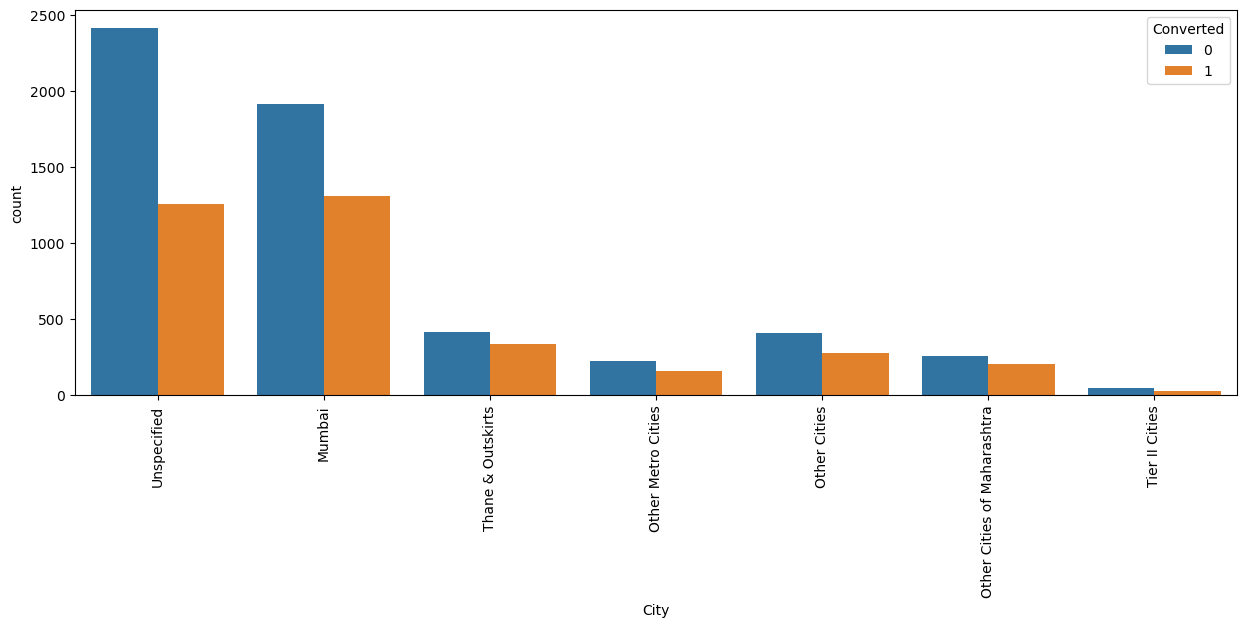

In [32]:
#plotting spread of City columnn after replacing NaN values
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=leads, x='City', hue='Converted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [33]:
#checking value counts of Specialization column

leads['Specialization'].value_counts(dropna=False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [34]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a students
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

leads['Specialization'] = leads['Specialization'].replace(np.nan, 'Not Specified')

In [35]:
#checking value counts of Specialization column after changing

leads['Specialization'].value_counts(dropna=False)

Specialization
Not Specified                        3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

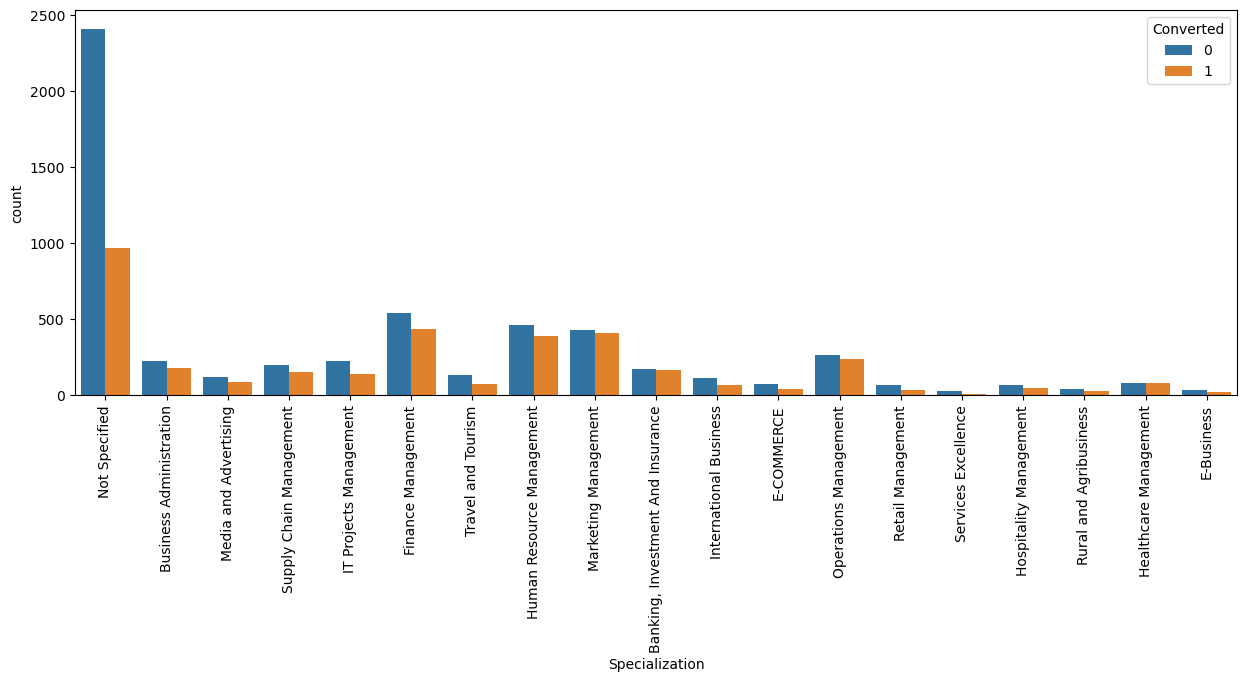

In [36]:
#plotting spread of Specialization columnn

plt.figure(figsize=(15, 5))
ax = sns.countplot(data=leads, x='Specialization', hue='Converted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

We see that specialization with Management in them have higher number of leads as well as leads converted. So this is definitely a significant variable and should not be dropped.

In [37]:
#combining Management Specializations because they show similar trends

leads['Specialization'] = leads['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')

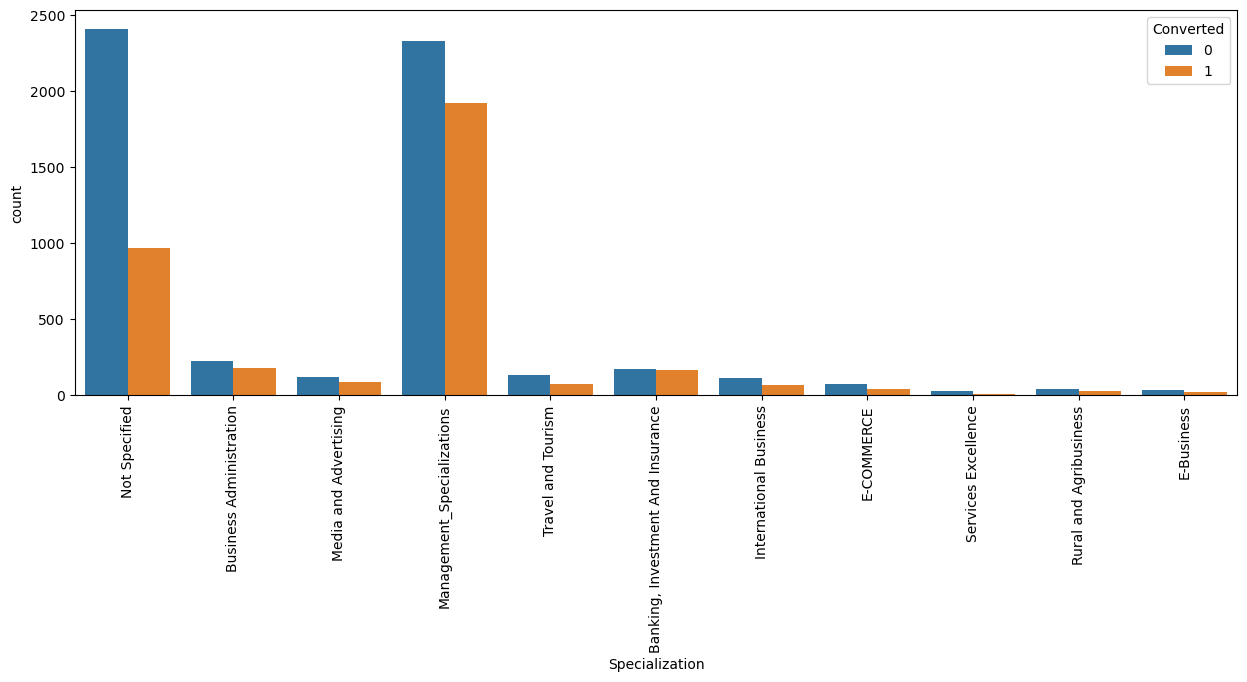

In [38]:
#visualizing count of Variable based on Converted value


plt.figure(figsize=(15, 5))
ax = sns.countplot(data=leads, x='Specialization', hue='Converted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [39]:
#What is your current occupation

leads['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [40]:
#imputing Nan values with mode "Unspecified"

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unspecified')

In [41]:
#checking count of values
leads['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
Unspecified             2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

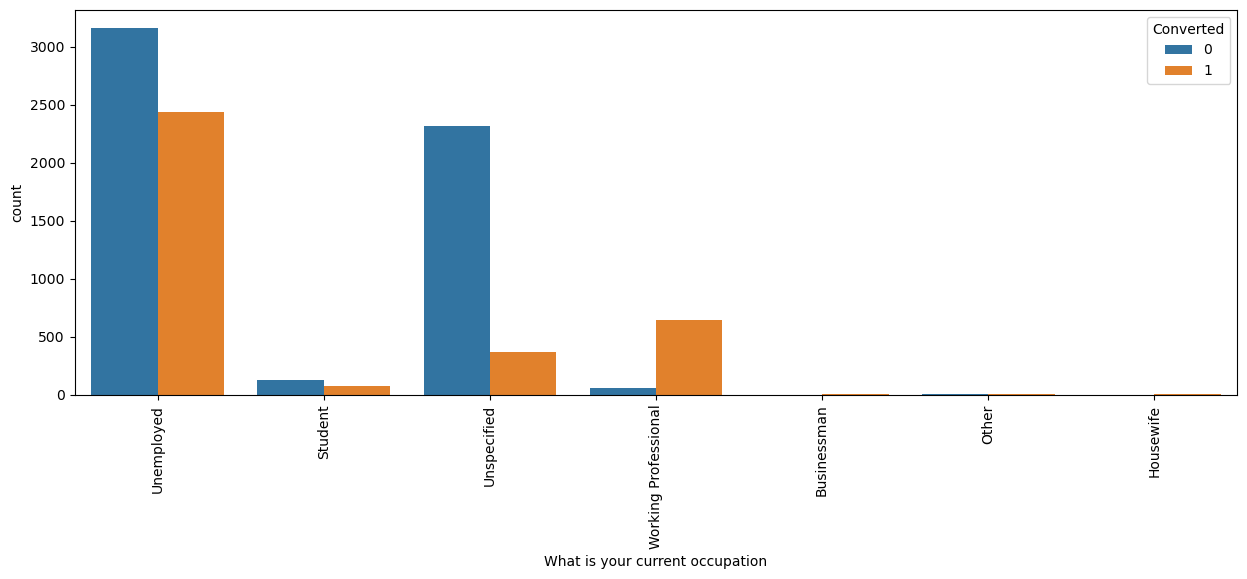

In [42]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=leads, x='What is your current occupation', hue='Converted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Working Professionals going for the course have high chances of joining it.
Unemployed & UNspecified leads are the most in terms of Absolute numbers.

In [43]:
#checking value counts for 'What matters most to you in choosing a course' :

leads['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [44]:
#replacing Nan values with Mode "Better Career Prospects"

leads['What matters most to you in choosing a course'] = leads['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

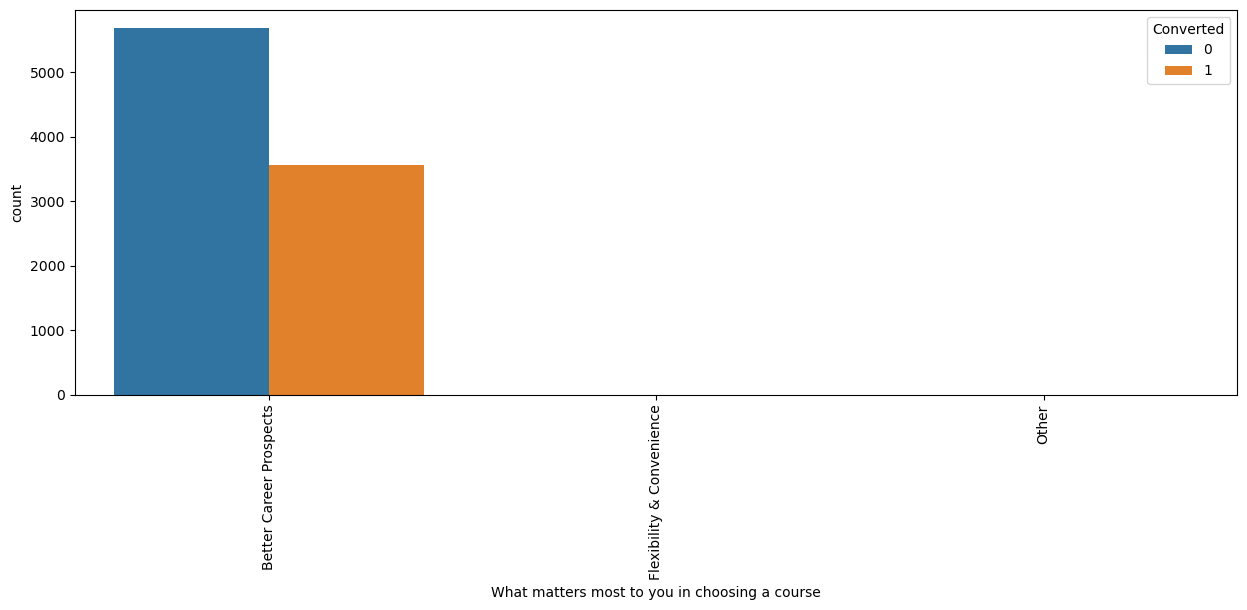

In [45]:
#visualizing count of Variable based on Converted value



plt.figure(figsize=(15, 5))
ax = sns.countplot(data=leads, x='What matters most to you in choosing a course', hue='Converted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [46]:
#checking value counts of variable
leads['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      9237
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [47]:
#Here again we have another Column that is worth Dropping becauase of data skewness. So we Append to the cols_to_drop List
cols_to_drop.append('What matters most to you in choosing a course')
cols_to_drop

['What matters most to you in choosing a course']

In [48]:
#checking value counts of Tag variable
leads['Tags'].value_counts(dropna=False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

In [49]:
#replacing Nan values with "Not Specified"
leads['Tags'] = leads['Tags'].replace(np.nan,'Not Specified')

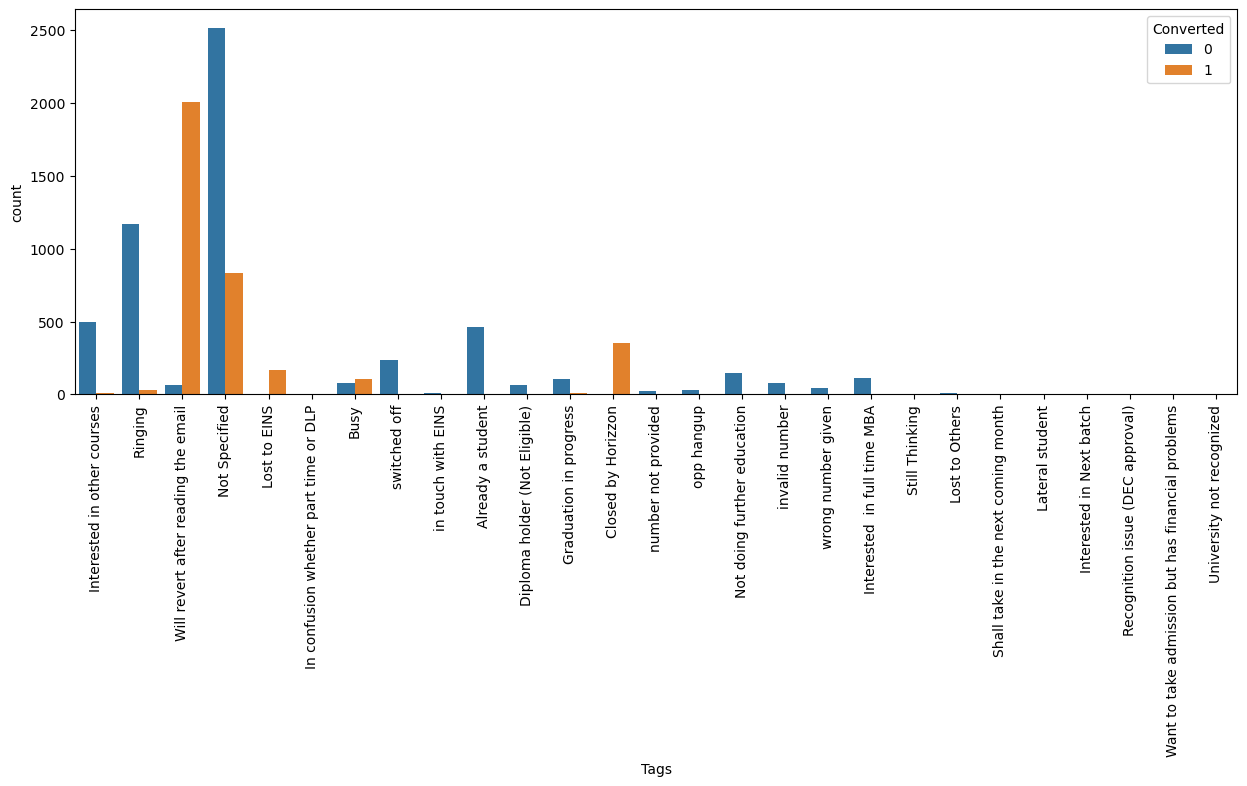

In [50]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15, 5))
ax = sns.countplot(data=leads, x='Tags', hue='Converted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

##### We can replace tags with low frequency with "Other Tags"

In [51]:
Tag_counts = leads['Tags'].value_counts()
# Identify countries with low frequency (less than 10)
low_freq_Tags = Tag_counts[Tag_counts < 250].index
low_freq_Tags

Index(['switched off', 'Busy', 'Lost to EINS', 'Not doing further education',
       'Interested  in full time MBA', 'Graduation in progress',
       'invalid number', 'Diploma holder (Not Eligible)', 'wrong number given',
       'opp hangup', 'number not provided', 'in touch with EINS',
       'Lost to Others', 'Still Thinking',
       'Want to take admission but has financial problems',
       'In confusion whether part time or DLP', 'Interested in Next batch',
       'Lateral student', 'Shall take in the next coming month',
       'University not recognized', 'Recognition issue (DEC approval)'],
      dtype='object', name='Tags')

In [52]:
# Replace low frequency Tags with 'Other Tags'
leads['Tags'] = leads['Tags'].apply(lambda x: 'Other Tags' if x in low_freq_Tags else x)

In [53]:
#checking value counts of Tag variable after the changes :
leads['Tags'].value_counts(dropna=False)

Tags
Not Specified                          3353
Will revert after reading the email    2072
Other Tags                             1276
Ringing                                1203
Interested in other courses             513
Already a student                       465
Closed by Horizzon                      358
Name: count, dtype: int64

In [54]:
#checking percentage of missing values
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [55]:
#checking value counts of Lead Source column

leads['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
NaN                    36
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: count, dtype: int64

In [56]:
# replacing Nan Values and combining certain values:
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Others')
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')

In [57]:
# eplacing low frequency values with Others :
Lead_source_counts = leads['Lead Source'].value_counts()
# Identify Lead Sources with low frequency (less than 500)
low_freq_Lead_source = Lead_source_counts[Lead_source_counts < 500].index
low_freq_Lead_source

Index(['Welingak Website', 'Referral Sites', 'Facebook', 'Others', 'bing',
       'Click2call', 'Press_Release', 'Social Media', 'Live Chat',
       'youtubechannel', 'testone', 'Pay per Click Ads', 'welearnblog_Home',
       'WeLearn', 'blog', 'NC_EDM'],
      dtype='object', name='Lead Source')

In [58]:
# Replace low frequency Lead Source with 'Others'
leads['Lead Source'] = leads['Lead Source'].apply(lambda x: 'Others' if x in low_freq_Lead_source else x)

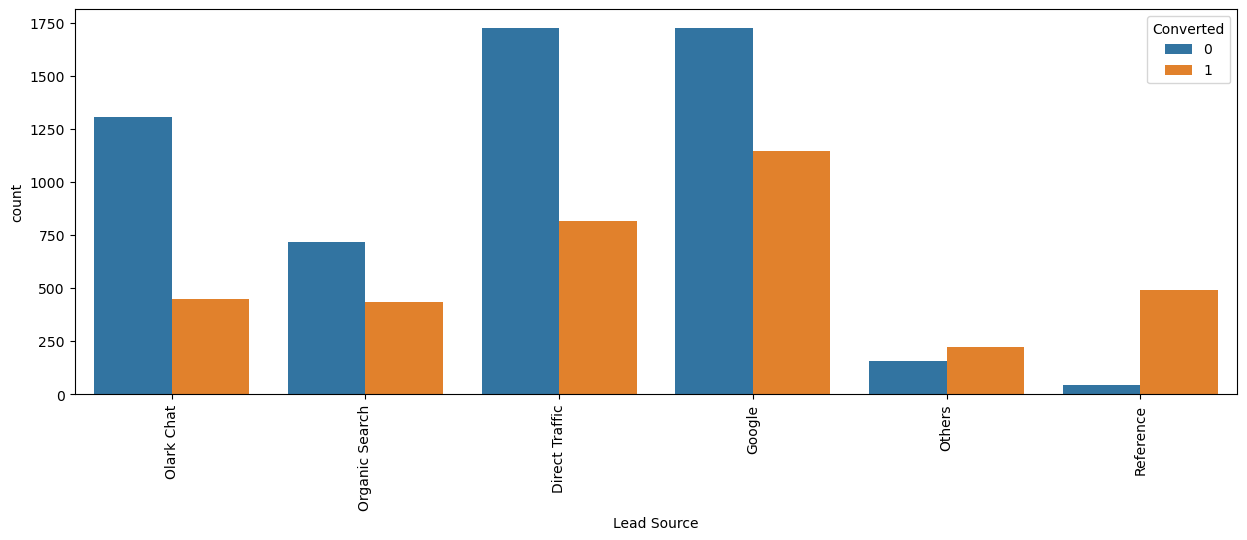

In [59]:
#visualizing count of Variable based on Converted value
plt.figure(figsize=(15, 5))
ax = sns.countplot(data=leads, x='Lead Source', hue='Converted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Inference
1. Maximum number of leads are generated by Google and Direct traffic.
2. Conversion Rate of reference leads and leads through welingak website is high.
3. To improve overall lead conversion rate, focus should be on improving lead converion of olark chat, organic search, direct traffic, and google leads and generate more leads from reference and welingak website.

In [60]:
# Last Activity:

leads['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
NaN                              103
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [61]:
#replacing Nan Values and combining low frequency values

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Others')
leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation',
                                                        'Approached upfront',
                                                        'View in browser link Clicked',
                                                        'Email Marked Spam',
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [62]:
# Last Activity:

leads['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Others                        308
Email Link Clicked            267
Form Submitted on Website     116
Name: count, dtype: int64

In [63]:
#Check the Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.00
Lead Source                                      0.00
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    0.00
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [64]:
#Drop all rows which have Nan Values. Since the number of Dropped rows is less than 2%, it will not affect the model
leads = leads.dropna()

In [65]:
leads.shape

(9103, 31)

In [66]:
#Checking percentage of Null Values in All Columns:
round(100*(leads.isnull().sum()/len(leads.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [67]:
#Lead Origin
leads['Lead Origin'].value_counts(dropna=False)

Lead Origin
Landing Page Submission    4886
API                        3578
Lead Add Form               608
Lead Import                  31
Name: count, dtype: int64

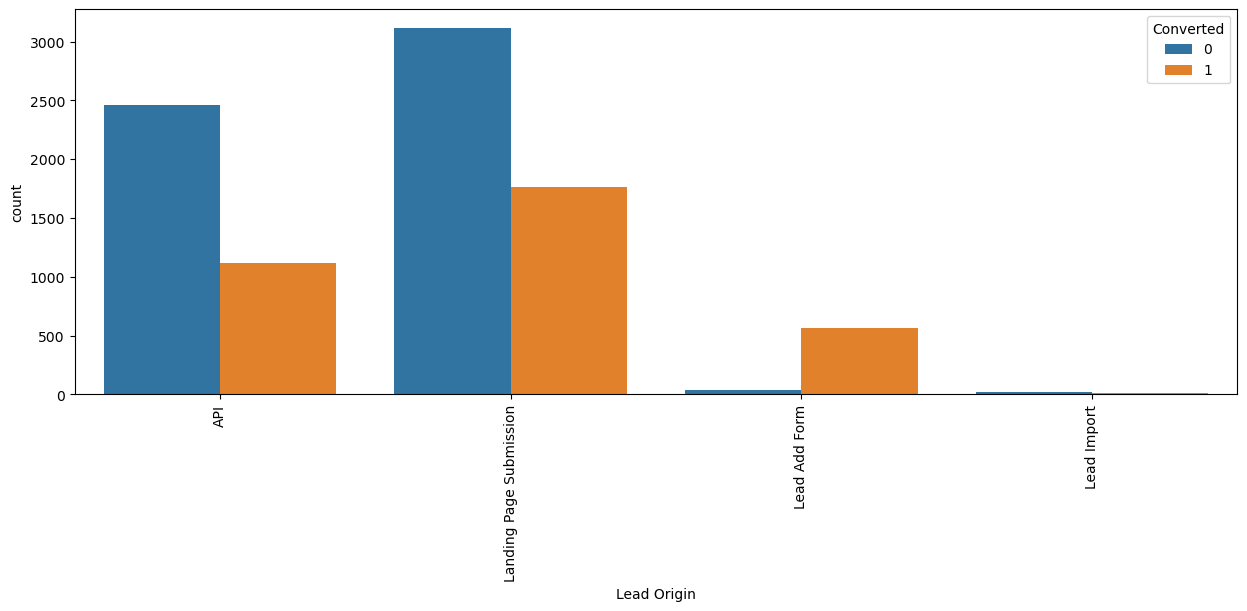

In [68]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15, 5))
ax = sns.countplot(data=leads, x='Lead Origin', hue='Converted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

Inference

1. API and Landing Page Submission bring higher number of leads as well as conversion.
2. Lead Add Form has a very high conversion rate but count of leads are not very high.
3. Lead Import and Quick Add Form get very few leads.
4. In order to improve overall lead conversion rate, we have to improve lead converion of API and Landing Page Submission origin and generate more leads from Lead Add Form.

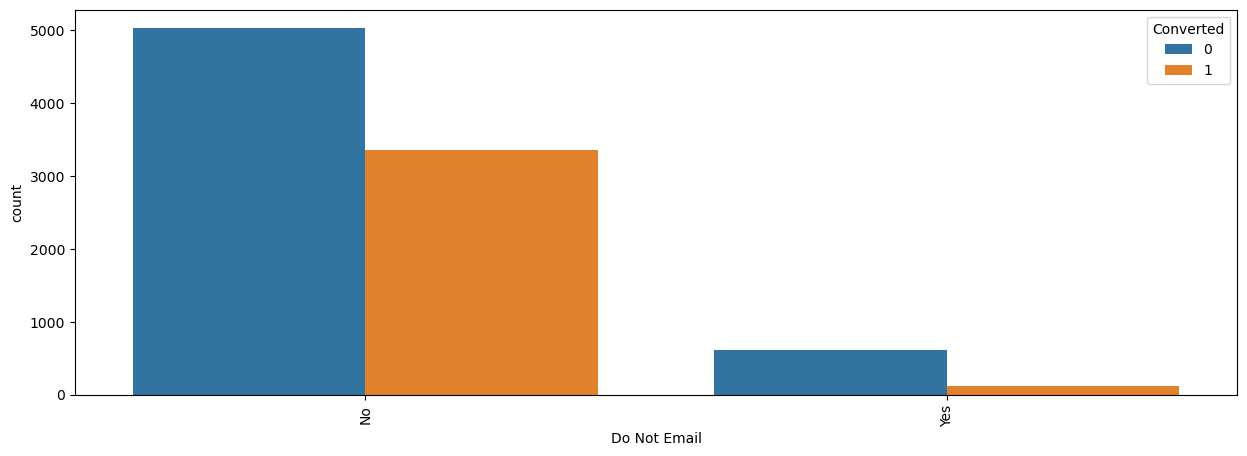

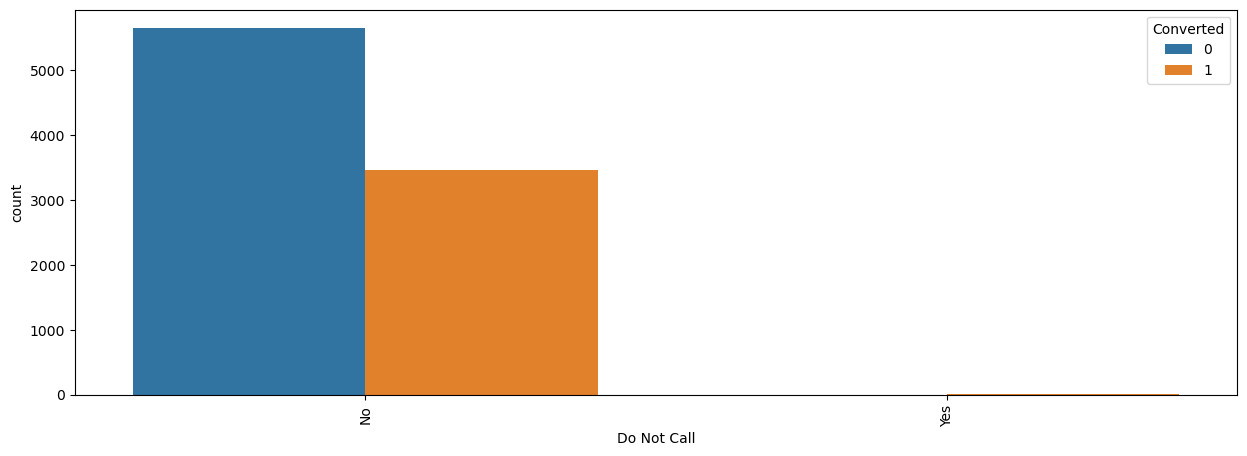

In [69]:
#Do Not Email & Do Not Call
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15,5))
ax = sns.countplot(data=leads, x='Do Not Email', hue='Converted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

plt.figure(figsize=(15, 5))
ax = sns.countplot(data=leads, x='Do Not Call', hue='Converted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [70]:
#checking value counts for Asymmetrique Activity Index :
leads['Asymmetrique Activity Index'].value_counts(dropna=False)

Asymmetrique Activity Index
Unknown      4168
02.Medium    3753
01.High       820
03.Low        362
Name: count, dtype: int64

In [71]:
#checking value counts for Do Not Call
leads['Do Not Call'].value_counts(dropna=False)

Do Not Call
No     9101
Yes       2
Name: count, dtype: int64

In [72]:
#checking value counts for Do Not Email
leads['Do Not Email'].value_counts(dropna=False)

Do Not Email
No     8379
Yes     724
Name: count, dtype: int64

We Can append the Do Not Call Column to the list of Columns to be Dropped since > 90% is of only one Value

In [73]:
cols_to_drop.append('Do Not Call')
cols_to_drop

['What matters most to you in choosing a course', 'Do Not Call']

#### IMBALANCED VARIABLES THAT CAN BE DROPPED

In [74]:
leads.Search.value_counts(dropna=False)

Search
No     9089
Yes      14
Name: count, dtype: int64

In [75]:
leads.Magazine.value_counts(dropna=False)

Magazine
No    9103
Name: count, dtype: int64

In [76]:
leads['Newspaper Article'].value_counts(dropna=False)

Newspaper Article
No     9101
Yes       2
Name: count, dtype: int64

In [77]:
leads['X Education Forums'].value_counts(dropna=False)

X Education Forums
No     9102
Yes       1
Name: count, dtype: int64

In [78]:
leads['Newspaper'].value_counts(dropna=False)

Newspaper
No     9102
Yes       1
Name: count, dtype: int64

In [79]:
leads['Digital Advertisement'].value_counts(dropna=False)

Digital Advertisement
No     9099
Yes       4
Name: count, dtype: int64

In [80]:
leads['Through Recommendations'].value_counts(dropna=False)

Through Recommendations
No     9096
Yes       7
Name: count, dtype: int64

In [81]:
leads['Receive More Updates About Our Courses'].value_counts(dropna=False)

Receive More Updates About Our Courses
No    9103
Name: count, dtype: int64

In [82]:
leads['Update me on Supply Chain Content'].value_counts(dropna=False)

Update me on Supply Chain Content
No    9103
Name: count, dtype: int64

In [83]:
leads['Get updates on DM Content'].value_counts(dropna=False)

Get updates on DM Content
No    9103
Name: count, dtype: int64

In [84]:
leads['I agree to pay the amount through cheque'].value_counts(dropna=False)

I agree to pay the amount through cheque
No    9103
Name: count, dtype: int64

In [85]:
leads['A free copy of Mastering The Interview'].value_counts(dropna=False)

A free copy of Mastering The Interview
No     6215
Yes    2888
Name: count, dtype: int64

In [86]:
#adding imbalanced columns to the list of columns to be dropped

cols_to_drop.extend(['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque'])

In [87]:
#checking value counts of last Notable Activity
leads['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3270
Email Opened                    2827
SMS Sent                        2172
Page Visited on Website          318
Olark Chat Conversation          183
Email Link Clicked               173
Email Bounced                     60
Unsubscribed                      47
Unreachable                       32
Had a Phone Conversation          14
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [88]:
#clubbing lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront',
                                                                       'Form Submitted on Website',
                                                                       'Email Received'],'Other_Notable_activity')

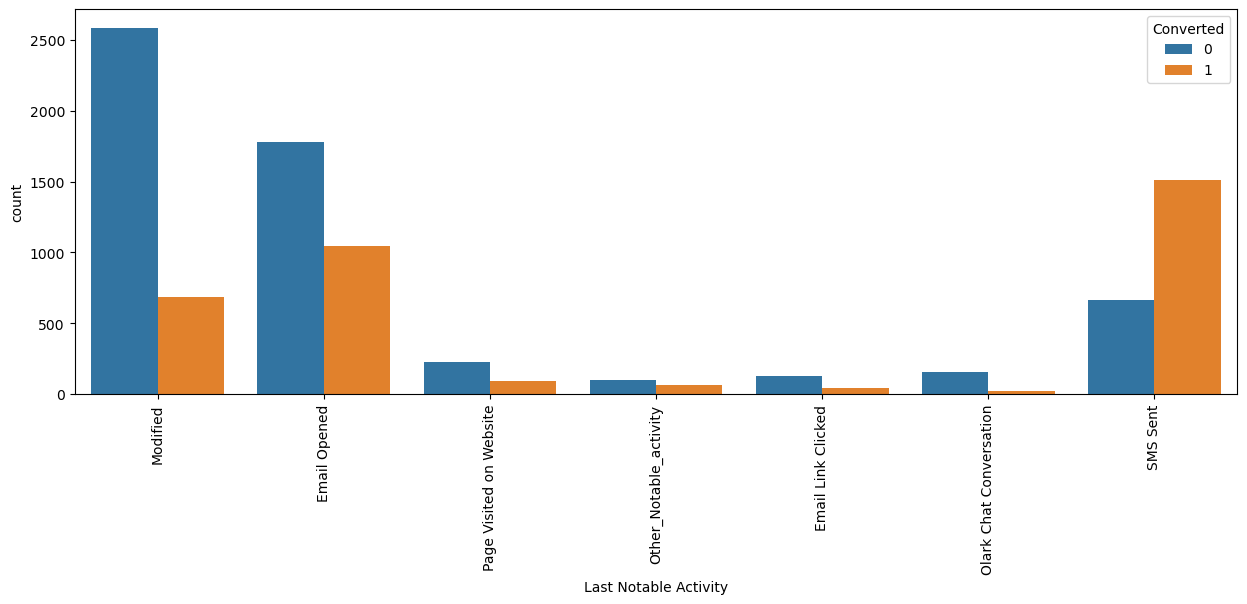

In [89]:
#visualizing count of Variable based on Converted value

plt.figure(figsize=(15, 5))
ax = sns.countplot(data=leads, x='Last Notable Activity', hue='Converted')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

In [90]:
#checking value counts for variable

leads['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                   3270
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Email Link Clicked          173
Other_Notable_activity      160
Name: count, dtype: int64

In [91]:
#list of columns to be dropped
cols_to_drop

['What matters most to you in choosing a course',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']

In [92]:
#dropping columns
leads = leads.drop(cols_to_drop,axis=1)
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   object 
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Last Activity                           9103 non-null   object 
 8   Country                                 9103 non-null   object 
 9   Specialization                          9103 non-null   object 
 10  What is your current occupation         9103 non-null   object 
 

In [93]:
# Rename the columns with long names :
leads.rename(columns={'What is your current occupation': 'Current occupation'}, inplace=True)
leads.rename(columns={'Asymmetrique Activity Index': 'Activity Index'}, inplace=True)
leads.rename(columns={'A free copy of Mastering The Interview': 'Free copy interview'}, inplace=True)

In [94]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9103 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Lead Origin                  9103 non-null   object 
 1   Lead Source                  9103 non-null   object 
 2   Do Not Email                 9103 non-null   object 
 3   Converted                    9103 non-null   int64  
 4   TotalVisits                  9103 non-null   float64
 5   Total Time Spent on Website  9103 non-null   int64  
 6   Page Views Per Visit         9103 non-null   float64
 7   Last Activity                9103 non-null   object 
 8   Country                      9103 non-null   object 
 9   Specialization               9103 non-null   object 
 10  Current occupation           9103 non-null   object 
 11  Tags                         9103 non-null   object 
 12  Lead Quality                 9103 non-null   object 
 13  Lead Profile           

##### Numerical Attributes Analysis:

In [95]:
#Check the % of Data that has Converted Values = 1:

Converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
Converted

38.02043282434362

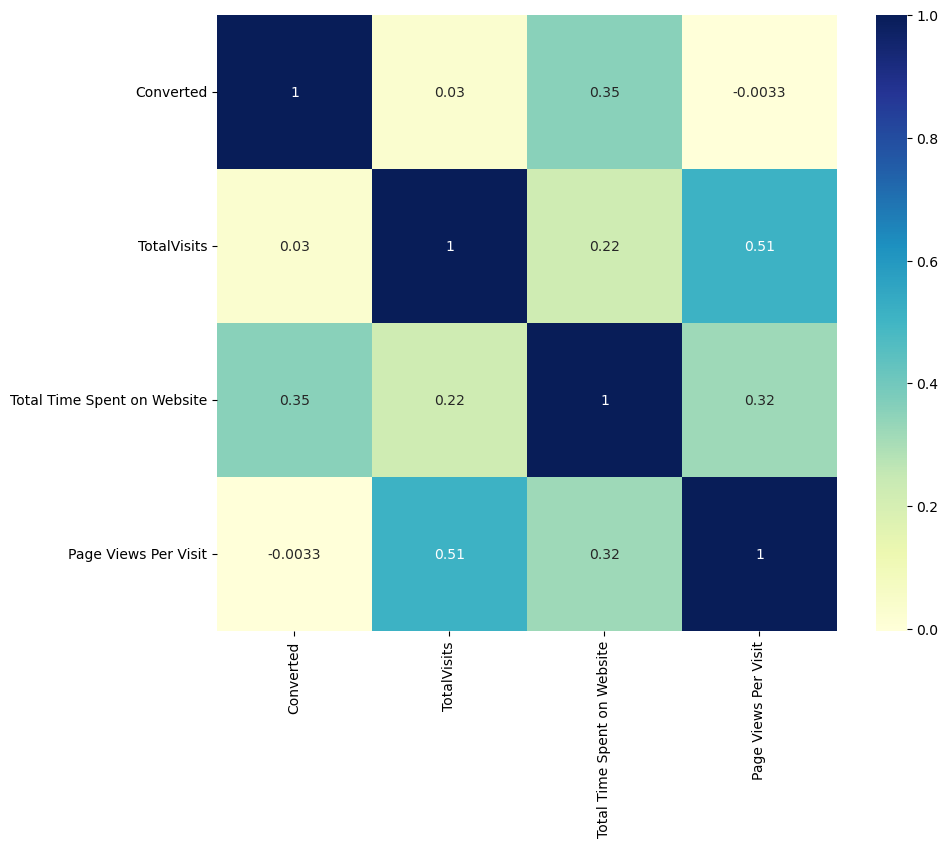

In [96]:
#Checking correlations of numeric values
# figure size
plt.figure(figsize=(10,8))

# heatmap
sns.heatmap(leads[['Converted','TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr(), cmap="YlGnBu", annot=True)
plt.show()

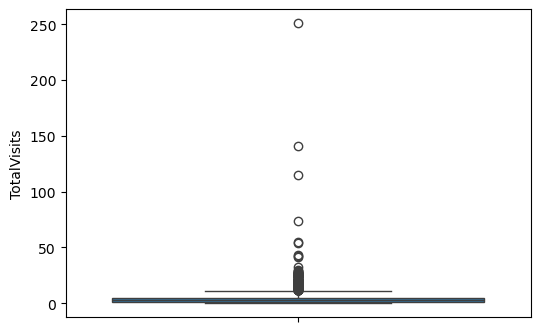

In [97]:
#Total Visits
#visualizing spread of variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['TotalVisits'])
plt.show()

We can see presence of outliers here

In [98]:
#checking percentile values for "Total Visits"

leads['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

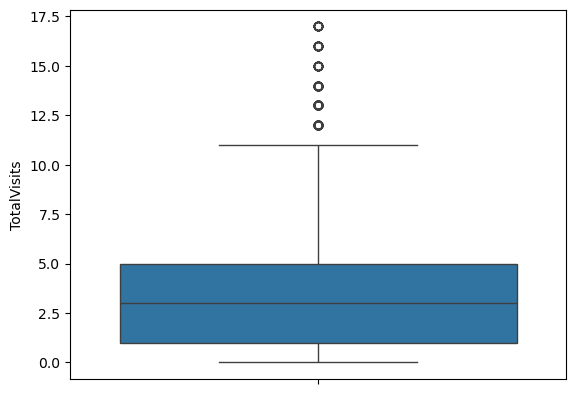

In [99]:
#Outlier Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = leads.TotalVisits.quantile(0.99)
leads = leads[(leads.TotalVisits <= Q3)]
Q1 = leads.TotalVisits.quantile(0.01)
leads = leads[(leads.TotalVisits >= Q1)]
sns.boxplot(y=leads['TotalVisits'])
plt.show()

In [100]:
leads.shape

(9020, 18)

Check for the Next Numerical Column:

In [101]:
#checking percentiles for "Total Time Spent on Website"

leads['Total Time Spent on Website'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9020.000000
mean      479.759534
std       544.688157
min         0.000000
5%          0.000000
25%         7.000000
50%       243.000000
75%       915.250000
90%      1371.000000
95%      1554.050000
99%      1836.620000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

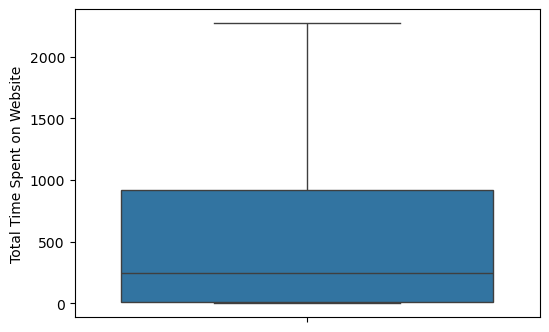

In [102]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Total Time Spent on Website'])
plt.show()

Since there are no major Outliers for the above variable we don't do any Outlier Treatment for this above Column

Check for Page Views Per Visit:

In [103]:
#checking spread of "Page Views Per Visit"

leads['Page Views Per Visit'].describe()

count    9020.000000
mean        2.337271
std         2.062363
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

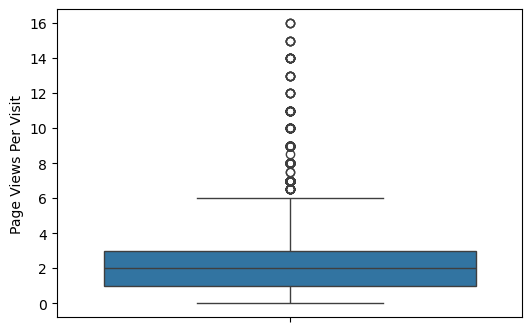

In [104]:
#visualizing spread of numeric variable

plt.figure(figsize=(6,4))
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

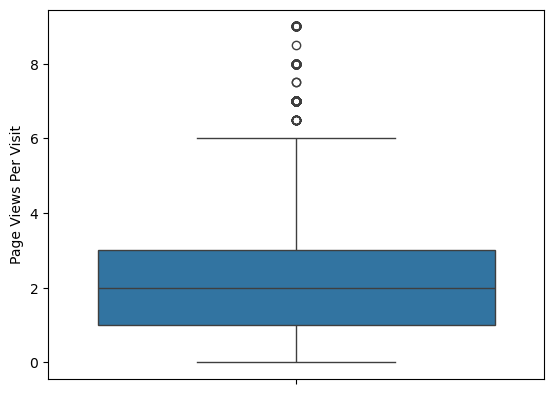

In [105]:
#Outlier Treatment: Remove top & bottom 1%

Q3 = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] <= Q3]
Q1 = leads['Page Views Per Visit'].quantile(0.01)
leads = leads[leads['Page Views Per Visit'] >= Q1]
sns.boxplot(y=leads['Page Views Per Visit'])
plt.show()

In [106]:
leads.shape

(8953, 18)

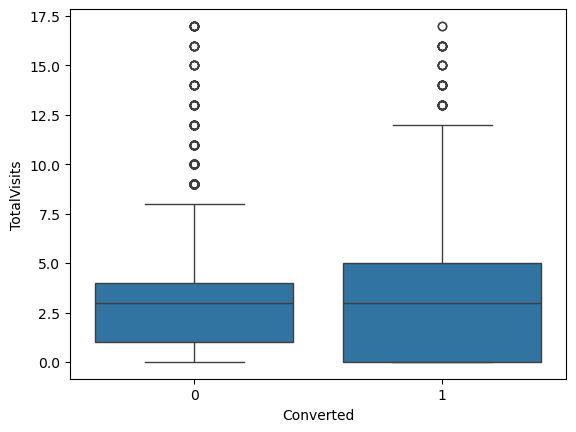

In [107]:
#checking Spread of "Total Visits" vs Converted variable
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads)
plt.show()

Inference

1. Median for converted and not converted leads are the close.
2. Nothng conclusive can be said on the basis of Total Visits


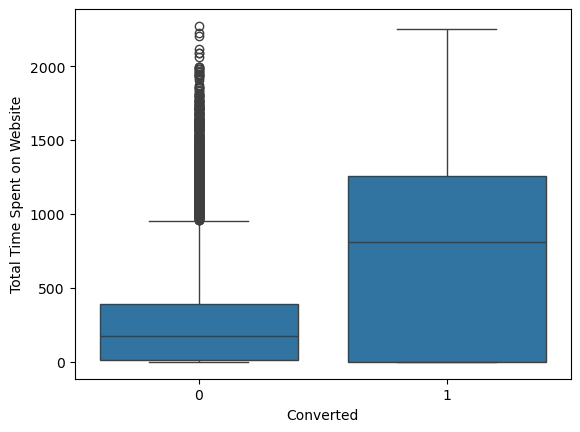

In [108]:
#checking Spread of "Total Time Spent on Website" vs Converted variable

sns.boxplot(x=leads.Converted, y=leads['Total Time Spent on Website'])
plt.show()

Inference

1. Leads spending more time on the website are more likely to be converted.
2. Website should be made more engaging to make leads spend more time.

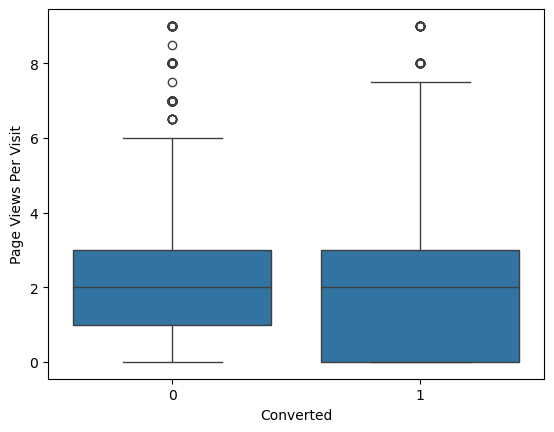

In [109]:
#checking Spread of "Page Views Per Visit" vs Converted variable

sns.boxplot(x=leads.Converted,y=leads['Page Views Per Visit'])
plt.show()

Inference

1. Median for converted and unconverted leads is the same.
2. Nothing can be said specifically for lead conversion from Page Views Per Visit

In [110]:
#checking missing values in leftover columns/

round(100*(leads.isnull().sum()/len(leads.index)),2)

Lead Origin                    0.0
Lead Source                    0.0
Do Not Email                   0.0
Converted                      0.0
TotalVisits                    0.0
Total Time Spent on Website    0.0
Page Views Per Visit           0.0
Last Activity                  0.0
Country                        0.0
Specialization                 0.0
Current occupation             0.0
Tags                           0.0
Lead Quality                   0.0
Lead Profile                   0.0
City                           0.0
Activity Index                 0.0
Free copy interview            0.0
Last Notable Activity          0.0
dtype: float64

There are no missing values in the columns to be analyzed further

##### Dummy Variable Creation:

In [111]:
#getting a list of categorical columns

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'Current occupation', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Activity Index',
       'Free copy interview', 'Last Notable Activity'],
      dtype='object')

In [112]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,Current occupation,Tags,Lead Quality,Lead Profile,City,Activity Index,Free copy interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Unknown,Not Specified,Unemployed,Interested in other courses,Low in Relevance,Unknown,Unspecified,02.Medium,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Not Specified,Unemployed,Ringing,Unknown,Unknown,Unspecified,02.Medium,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Others,India,Media and Advertising,Unemployed,Ringing,Not Sure,Unknown,Mumbai,02.Medium,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Not Specified,Unemployed,Will revert after reading the email,Might be,Unknown,Mumbai,02.Medium,No,Modified


In [113]:
# List of variables with vales yes/no to map

varlist =  ['Free copy interview','Do Not Email']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads[varlist] = leads[varlist].apply(binary_map)

In [114]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,Current occupation,Tags,Lead Quality,Lead Profile,City,Activity Index,Free copy interview,Last Notable Activity
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unknown,Not Specified,Unemployed,Interested in other courses,Low in Relevance,Unknown,Unspecified,02.Medium,0,Modified
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Not Specified,Unemployed,Ringing,Unknown,Unknown,Unspecified,02.Medium,0,Email Opened
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,1,Email Opened
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,India,Media and Advertising,Unemployed,Ringing,Not Sure,Unknown,Mumbai,02.Medium,0,Modified
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,India,Not Specified,Unemployed,Will revert after reading the email,Might be,Unknown,Mumbai,02.Medium,0,Modified


In [115]:
#getting dummies and dropping the first column and adding the results to the master dataframe
dummy = pd.get_dummies(leads[['Lead Origin','Current occupation',
                             'City']], drop_first=True)

leads = pd.concat([leads,dummy],axis=1)

In [116]:
dummy = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy = dummy.drop(['Specialization_Not Specified'], axis=1)
leads = pd.concat([leads, dummy], axis = 1)

In [117]:
dummy = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy = dummy.drop(['Lead Source_Others'], axis=1)
leads = pd.concat([leads, dummy], axis = 1)

In [118]:
dummy = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy = dummy.drop(['Last Activity_Others'], axis=1)
leads = pd.concat([leads, dummy], axis = 1)

In [119]:
dummy = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy = dummy.drop(['Last Notable Activity_Other_Notable_activity'], axis=1)
leads = pd.concat([leads, dummy], axis = 1)

In [120]:
dummy = pd.get_dummies(leads['Tags'], prefix  = 'Tags')
dummy = dummy.drop(['Tags_Not Specified'], axis=1)
leads = pd.concat([leads, dummy], axis = 1)

In [121]:
dummy = pd.get_dummies(leads['Country'], prefix  = 'Country')
dummy = dummy.drop(['Country_Unknown'], axis=1)
leads = pd.concat([leads, dummy], axis = 1)

In [122]:
dummy = pd.get_dummies(leads['Lead Quality'], prefix  = 'Lead_Quality')
dummy = dummy.drop(['Lead_Quality_Unknown'], axis=1)
leads = pd.concat([leads, dummy], axis = 1)

In [123]:
dummy = pd.get_dummies(leads['Lead Profile'], prefix  = 'Lead_Profile')
dummy = dummy.drop(['Lead_Profile_Unknown'], axis=1)
leads = pd.concat([leads, dummy], axis = 1)

In [124]:
dummy = pd.get_dummies(leads['Activity Index'], prefix  = 'Activity_index')
dummy = dummy.drop(['Activity_index_Unknown'], axis=1)
leads = pd.concat([leads, dummy], axis = 1)

In [125]:
# Setting to view all columns :
pd.set_option('display.max_columns', None)

In [126]:
leads.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,Current occupation,Tags,Lead Quality,Lead Profile,City,Activity Index,Free copy interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Current occupation_Housewife,Current occupation_Other,Current occupation_Student,Current occupation_Unemployed,Current occupation_Unspecified,Current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unspecified,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Country_India,Country_Others,Country_United Arab Emirates,Country_United States,Lead_Quality_High in Relevance,Lead_Quality_Low in Relevance,Lead_Quality_Might be,Lead_Quality_Not Sure,Lead_Quality_Worst,Lead_Profile_Dual Specialization Student,Lead_Profile_Lateral Student,Lead_Profile_Other Leads,Lead_Profile_Potential Lead,Lead_Profile_Student of SomeSchool,Activity_index_01.High,Activity_index_02.Medium,Activity_index_03.Low
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Unknown,Not Specified,Unemployed,Interested in other courses,Low in Relevance,Unknown,Unspecified,02.Medium,0,Modified,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,India,Not Specified,Unemployed,Ringing,Unknown,Unknown,Unspecified,02.Medium,0,Email Opened,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,1,Email Opened,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,India,Media and Advertis

In [127]:
#dropping the original categorical columns after dummy variable creation

leads.drop(cat_cols,axis=1,inplace = True)

In [128]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Current occupation_Housewife,Current occupation_Other,Current occupation_Student,Current occupation_Unemployed,Current occupation_Unspecified,Current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unspecified,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Country_India,Country_Others,Country_United Arab Emirates,Country_United States,Lead_Quality_High in Relevance,Lead_Quality_Low in Relevance,Lead_Quality_Might be,Lead_Quality_Not Sure,Lead_Quality_Worst,Lead_Profile_Dual Specialization Student,Lead_Profile_Lateral Student,Lead_Profile_Other Leads,Lead_Profile_Potential Lead,Lead_Profile_Student of SomeSchool,Activity_index_01.High,Activity_index_02.Medium,Activity_index_03.Low
0,0,0.0,0,0.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1,0,5.0,674,2.5,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,1,2.0,1532,2.0,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False
3,0,1.0,305,1.0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
4,1,2.0,1428,1.0,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False,False,F

In [129]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8953 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Converted                                         8953 non-null   int64  
 1   TotalVisits                                       8953 non-null   float64
 2   Total Time Spent on Website                       8953 non-null   int64  
 3   Page Views Per Visit                              8953 non-null   float64
 4   Lead Origin_Landing Page Submission               8953 non-null   bool   
 5   Lead Origin_Lead Add Form                         8953 non-null   bool   
 6   Lead Origin_Lead Import                           8953 non-null   bool   
 7   Current occupation_Housewife                      8953 non-null   bool   
 8   Current occupation_Other                          8953 non-null   bool   
 9   Current occupation_Stude

In [130]:
# Selecting only the columns with boolean data type for conversion to integer:
bool_columns = leads.select_dtypes(include='bool').columns

# Convert the boolean columns to integers
leads[bool_columns] = leads[bool_columns].astype(int)

In [131]:
leads.shape

(8953, 71)

In [132]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8953 entries, 0 to 9239
Data columns (total 71 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Converted                                         8953 non-null   int64  
 1   TotalVisits                                       8953 non-null   float64
 2   Total Time Spent on Website                       8953 non-null   int64  
 3   Page Views Per Visit                              8953 non-null   float64
 4   Lead Origin_Landing Page Submission               8953 non-null   int32  
 5   Lead Origin_Lead Add Form                         8953 non-null   int32  
 6   Lead Origin_Lead Import                           8953 non-null   int32  
 7   Current occupation_Housewife                      8953 non-null   int32  
 8   Current occupation_Other                          8953 non-null   int32  
 9   Current occupation_Stude

#### Train-Test Split & Logistic Regression Model Building:

In [133]:
from sklearn.model_selection import train_test_split

# Putting response variable to y
y = leads['Converted']

y.head()

X=leads.drop('Converted', axis=1)

In [134]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [135]:
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Current occupation_Housewife,Current occupation_Other,Current occupation_Student,Current occupation_Unemployed,Current occupation_Unspecified,Current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unspecified,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Country_India,Country_Others,Country_United Arab Emirates,Country_United States,Lead_Quality_High in Relevance,Lead_Quality_Low in Relevance,Lead_Quality_Might be,Lead_Quality_Not Sure,Lead_Quality_Worst,Lead_Profile_Dual Specialization Student,Lead_Profile_Lateral Student,Lead_Profile_Other Leads,Lead_Profile_Potential Lead,Lead_Profile_Student of SomeSchool,Activity_index_01.High,Activity_index_02.Medium,Activity_index_03.Low
9196,5.0,1490,5.00,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
4696,3.0,457,3.00,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3274,4.0,126,2.00,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2164,2.0,393,2.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1667,4.0,1167,1.33,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [136]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6267 entries, 9196 to 5825
Data columns (total 70 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   TotalVisits                                       6267 non-null   float64
 1   Total Time Spent on Website                       6267 non-null   int64  
 2   Page Views Per Visit                              6267 non-null   float64
 3   Lead Origin_Landing Page Submission               6267 non-null   int32  
 4   Lead Origin_Lead Add Form                         6267 non-null   int32  
 5   Lead Origin_Lead Import                           6267 non-null   int32  
 6   Current occupation_Housewife                      6267 non-null   int32  
 7   Current occupation_Other                          6267 non-null   int32  
 8   Current occupation_Student                        6267 non-null   int32  
 9   Current occupation_Un

##### Scaling of Data:

In [137]:
#scaling numeric columns - Scaling only 3 columns (As other columns are alreadt 1/0)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Current occupation_Housewife,Current occupation_Other,Current occupation_Student,Current occupation_Unemployed,Current occupation_Unspecified,Current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unspecified,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Country_India,Country_Others,Country_United Arab Emirates,Country_United States,Lead_Quality_High in Relevance,Lead_Quality_Low in Relevance,Lead_Quality_Might be,Lead_Quality_Not Sure,Lead_Quality_Worst,Lead_Profile_Dual Specialization Student,Lead_Profile_Lateral Student,Lead_Profile_Other Leads,Lead_Profile_Potential Lead,Lead_Profile_Student of SomeSchool,Activity_index_01.High,Activity_index_02.Medium,Activity_index_03.Low
9196,0.668862,1.848117,1.455819,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
4696,-0.030697,-0.037832,0.399961,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3274,0.319082,-0.642138,-0.127967,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2164,-0.380477,-0.154676,-0.127967,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1667,0.319082,1.258415,-0.481679,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0


##### Model Building using Stats Model & RFE:

In [138]:
import statsmodels.api as sm

In [139]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [140]:
rfe.support_

array([False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True, False,
        True, False, False,  True, False, False, False,  True, False,
       False, False, False, False, False, False,  True])

In [141]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 29),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 28),
 ('Lead Origin_Landing Page Submission', False, 13),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 9),
 ('Current occupation_Housewife', False, 30),
 ('Current occupation_Other', False, 31),
 ('Current occupation_Student', False, 42),
 ('Current occupation_Unemployed', False, 20),
 ('Current occupation_Unspecified', True, 1),
 ('Current occupation_Working Professional', False, 12),
 ('City_Other Cities', False, 52),
 ('City_Other Cities of Maharashtra', False, 41),
 ('City_Other Metro Cities', False, 39),
 ('City_Thane & Outskirts', False, 38),
 ('City_Tier II Cities', False, 26),
 ('City_Unspecified', False, 47),
 ('Specialization_Banking, Investment And Insurance', False, 17),
 ('Specialization_Business Administration', False, 56),
 ('Specialization_E-Business', False, 53),
 ('Specialization_E-COMMERCE', False, 45),
 ('Specialization_Internatio

In [142]:
#list of RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'Current occupation_Unspecified',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Other Tags', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Country_Others',
       'Lead_Quality_High in Relevance', 'Lead_Quality_Worst',
       'Activity_index_03.Low'],
      dtype='object')

In [143]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Current occupation_Housewife', 'Current occupation_Other',
       'Current occupation_Student', 'Current occupation_Unemployed',
       'Current occupation_Working Professional', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities', 'City_Unspecified',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'Lead Source_Direct Traffic',
       'Lead Sou

In [144]:
X_train[col].columns
X_train[col].info()

<class 'pandas.core.frame.DataFrame'>
Index: 6267 entries, 9196 to 5825
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype
---  ------                                    --------------  -----
 0   Lead Origin_Lead Add Form                 6267 non-null   int32
 1   Current occupation_Unspecified            6267 non-null   int32
 2   Last Activity_Email Bounced               6267 non-null   int32
 3   Last Activity_Olark Chat Conversation     6267 non-null   int32
 4   Last Notable Activity_SMS Sent            6267 non-null   int32
 5   Tags_Already a student                    6267 non-null   int32
 6   Tags_Closed by Horizzon                   6267 non-null   int32
 7   Tags_Interested in other courses          6267 non-null   int32
 8   Tags_Other Tags                           6267 non-null   int32
 9   Tags_Ringing                              6267 non-null   int32
 10  Tags_Will revert after reading the email  6267 non-null   int3

In [145]:
#BUILDING MODEL #1

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1548.5
Date:                Mon, 19 Aug 2024   Deviance:                       3096.9
Time:                        17:28:38   Pearson chi2:                 7.43e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5659
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.1865      0.118      1.580      0.114      -0.045       0.418
Lead Origin_Lead Add Form                    1.9376      0.319      6.079      0.000       1.313       2.562
Current occupation_Unspecified              -2.0770      0.134    -15.488      0.000      -2.340      -1.814
Last Activity_Email Bounced                 -1.7283      0.373     -4.631      0.000      -2.460      -0.997
Last Activity_Olark Chat Conversation       -1.3843      0.206     -6.720      0.000      -1.788      -0.981
Last Notable Activity_SMS Sent               1.8012      0.110     16.441      0.000       1.586       2.016
Tags_Already a student                      -4.3931      0.727     -6.043      0.000      -5.818      -2.968
Tags_Closed by Horizzon                      4.2549      1.024      4.156      0.000       2.248       6.261
Tags_Interested in other courses            -3.6291      0.383     -9.477      0.000      -4.380      -2.879
Tags_Other Tags                             -1.4641      0.148     -9.877      0.000      -1.755      -1.174
Tags_Ringing                                -4.6738      0.249    -18.785      0.000      -5.161      -4.186
Tags_Will revert after reading the email     2.7152      0.200     13.592      0.000       2.324       3.107
Country_Others                              -0.8860      0.356     -2.488      0.013      -1.584      -0.188
Lead_Quality_High in Relevance               1.4147      0.385      3.676      0.000       0.660       2.169
Lead_Quality_Worst                          -1.6560      0.370     -4.479      0.000      -2.381      -0.931
Activity_index_03.Low                       -2.4722      0.370     -6.685      0.000      -3.197      -1.747
============================================================================================================
"""

p-value of variable 'Country_Others' is relatively high, so we can drop it.

In [146]:
#dropping column with high p-value

col = col.drop('Country_Others',1)

In [147]:
#BUILDING MODEL #2

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1551.8
Date:                Mon, 19 Aug 2024   Deviance:                       3103.6
Time:                        17:34:20   Pearson chi2:                 7.39e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5655
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.1820      0.118      1.543      0.123      -0.049       0.413
Lead Origin_Lead Add Form                    1.9525      0.319      6.127      0.000       1.328       2.577
Current occupation_Unspecified              -2.0841      0.134    -15.549      0.000      -2.347      -1.821
Last Activity_Email Bounced                 -1.7202      0.373     -4.616      0.000      -2.451      -0.990
Last Activity_Olark Chat Conversation       -1.3736      0.206     -6.677      0.000      -1.777      -0.970
Last Notable Activity_SMS Sent               1.7878      0.109     16.376      0.000       1.574       2.002
Tags_Already a student                      -4.4051      0.727     -6.058      0.000      -5.830      -2.980
Tags_Closed by Horizzon                      4.2290      1.024      4.131      0.000       2.223       6.235
Tags_Interested in other courses            -3.6317      0.383     -9.484      0.000      -4.382      -2.881
Tags_Other Tags                             -1.4887      0.148    -10.057      0.000      -1.779      -1.199
Tags_Ringing                                -4.6767      0.249    -18.810      0.000      -5.164      -4.189
Tags_Will revert after reading the email     2.6943      0.199     13.517      0.000       2.304       3.085
Lead_Quality_High in Relevance               1.4330      0.385      3.724      0.000       0.679       2.187
Lead_Quality_Worst                          -1.6307      0.369     -4.416      0.000      -2.354      -0.907
Activity_index_03.Low                       -2.4549      0.369     -6.650      0.000      -3.178      -1.731
============================================================================================================
"""

Since p-value of all variables are 0, let us check VIF

In [148]:
# Check for the VIF values of the feature variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [149]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Lead_Quality_Worst,1.73
5,Tags_Already a student,1.60
10,Tags_Will revert after reading the email,1.56
4,Last Notable Activity_SMS Sent,1.49
11,Lead_Quality_High in Relevance,1.40
6,Tags_Closed by Horizzon,1.31
0,Lead Origin_Lead Add Form,1.26
3,Last Activity_Olark Chat Conversation,1.24
1,Current occupation_Unspecified,1.22
8,Tags_Other Tags,1.20


In [150]:
#dropping column with highest VIF value :

col = col.drop('Lead_Quality_Worst',1)

In [153]:
#BUILDING MODEL #3

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1565.5
Date:                Mon, 19 Aug 2024   Deviance:                       3131.0
Time:                        17:48:38   Pearson chi2:                 7.74e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5636
Covariance Type:            nonrobust                                         
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        0.1757      0.118      1.487      0.137      -0.056       0.407
Lead Origin_Lead Add Form                    1.9949      0.320      6.238      0.000       1.368       2.622
Current occupation_Unspecified              -2.0828      0.134    -15.492      0.000      -2.346      -1.819
Last Activity_Email Bounced                 -1.8102      0.375     -4.827      0.000      -2.545      -1.075
Last Activity_Olark Chat Conversation       -1.3724      0.205     -6.686      0.000      -1.775      -0.970
Last Notable Activity_SMS Sent               1.8115      0.109     16.676      0.000       1.599       2.024
Tags_Already a student                      -5.0793      0.719     -7.060      0.000      -6.489      -3.669
Tags_Closed by Horizzon                      4.1921      1.024      4.096      0.000       2.186       6.198
Tags_Interested in other courses            -3.7762      0.381     -9.901      0.000      -4.524      -3.029
Tags_Other Tags                             -1.6552      0.146    -11.375      0.000      -1.940      -1.370
Tags_Ringing                                -4.6942      0.249    -18.836      0.000      -5.183      -4.206
Tags_Will revert after reading the email     2.6819      0.199     13.480      0.000       2.292       3.072
Lead_Quality_High in Relevance               1.5539      0.391      3.975      0.000       0.788       2.320
Activity_index_03.Low                       -2.4252      0.371     -6.542      0.000      -3.152      -1.699
============================================================================================================
"""

Since p-value of all variables are 0, let us check VIF

In [154]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Tags_Will revert after reading the email,1.56
4,Last Notable Activity_SMS Sent,1.49
11,Lead_Quality_High in Relevance,1.40
6,Tags_Closed by Horizzon,1.31
0,Lead Origin_Lead Add Form,1.26
3,Last Activity_Olark Chat Conversation,1.23
1,Current occupation_Unspecified,1.22
8,Tags_Other Tags,1.11
9,Tags_Ringing,1.10
12,Activity_index_03.Low,1.07


In [155]:
#dropping column with the highest VIF value :

col = col.drop('Tags_Will revert after reading the email',1)

In [200]:
col

Index(['Lead Origin_Lead Add Form', 'Current occupation_Unspecified',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent', 'Tags_Already a student',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Other Tags', 'Tags_Ringing', 'Lead_Quality_High in Relevance',
       'Activity_index_03.Low'],
      dtype='object')

In [156]:
#BUILDING MODEL #4

X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6254
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1678.2
Date:                Mon, 19 Aug 2024   Deviance:                       3356.5
Time:                        17:50:37   Pearson chi2:                 1.11e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5476
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.5354      0.088     17.379      0.000       1.362       1.709
Lead Origin_Lead Add Form                 1.7771      0.325      5.467      0.000       1.140       2.414
Current occupation_Unspecified           -3.4223      0.111    -30.779      0.000      -3.640      -3.204
Last Activity_Email Bounced              -2.1201      0.353     -6.011      0.000      -2.811      -1.429
Last Activity_Olark Chat Conversation    -1.5487      0.195     -7.933      0.000      -1.931      -1.166
Last Notable Activity_SMS Sent            1.7986      0.107     16.749      0.000       1.588       2.009
Tags_Already a student                   -6.4452      0.716     -9.006      0.000      -7.848      -5.043
Tags_Closed by Horizzon                   2.7751      1.019      2.724      0.006       0.778       4.772
Tags_Interested in other courses         -5.1589      0.375    -13.754      0.000      -5.894      -4.424
Tags_Other Tags                          -3.0117      0.124    -24.219      0.000      -3.255      -2.768
Tags_Ringing                             -6.0232      0.238    -25.296      0.000      -6.490      -5.557
Lead_Quality_High in Relevance            2.0434      0.336      6.084      0.000       1.385       2.702
Activity_index_03.Low                    -2.4443      0.324     -7.549      0.000      -3.079      -1.810
=========================================================================================================
"""

Since 'All' the p-values are less we can check the Variance Inflation Factor to see if there is any correlation between the variables

In [157]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Tags_Closed by Horizzon,1.26
10,Lead_Quality_High in Relevance,1.24
3,Last Activity_Olark Chat Conversation,1.23
0,Lead Origin_Lead Add Form,1.21
1,Current occupation_Unspecified,1.21
4,Last Notable Activity_SMS Sent,1.21
8,Tags_Other Tags,1.09
9,Tags_Ringing,1.08
11,Activity_index_03.Low,1.06
2,Last Activity_Email Bounced,1.05


So the Values all seem to be in order so now, Moving on to derive the Probabilities, Lead Score, Predictions on Train Data:

In [158]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

9196    0.063613
4696    0.063613
3274    0.477938
2164    0.005640
1667    0.972850
7024    0.822799
8018    0.031201
778     0.131598
6942    0.046309
4440    0.131598
dtype: float64

In [159]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.06361329, 0.06361329, 0.47793844, 0.00563995, 0.97285006,
       0.82279871, 0.0312011 , 0.13159798, 0.04630852, 0.13159798])

In [160]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.063613,9196
1,0,0.063613,4696
2,0,0.477938,3274
3,0,0.005640,2164
4,1,0.972850,1667


In [161]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.063613,9196,0
1,0,0.063613,4696,0
2,0,0.477938,3274,0
3,0,0.005640,2164,0
4,1,0.972850,1667,1


In [162]:
from sklearn import metrics

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3629  253]
 [ 447 1938]]


In [163]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)*100)

88.83038136269347


In [165]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [166]:
# Let's see the sensitivity of our logistic regression model
round((TP / float(TP+FN))*100,2)

81.26

In [167]:
# Let us calculate specificity
round((TN / float(TN+FP))*100,2)

93.48

In [168]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.06517259144770737


In [169]:
# positive predictive value
print (TP / float(TP+FP))

0.8845276129621178


In [170]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8903336604514229


##### PLOTTING ROC CURVE


In [171]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [172]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

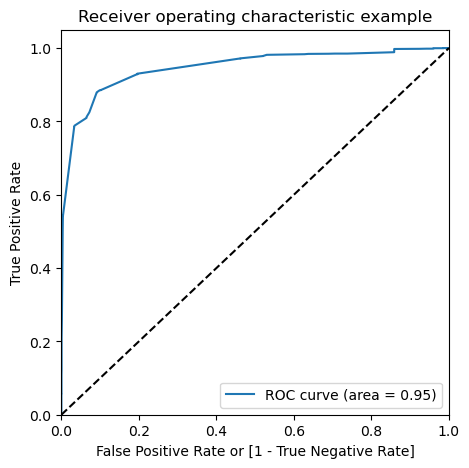

In [173]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

The ROC Curve should be a value close to 1. We are getting a good value of 0.97 indicating a good predictive model.

##### Finding Optimal Cutoff Point

Above we had chosen an arbitrary cut-off value of 0.5. We need to determine the best cut-off value and the below section deals with that:

In [174]:
# Let's create columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.063613,9196,0,1,0,0,0,0,0,0,0,0,0
1,0,0.063613,4696,0,1,0,0,0,0,0,0,0,0,0
2,0,0.477938,3274,0,1,1,1,1,1,0,0,0,0,0
3,0,0.005640,2164,0,1,0,0,0,0,0,0,0,0,0
4,1,0.972850,1667,1,1,1,1,1,1,1,1,1,1,1


In [175]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)


     prob  accuracy     sensi     speci
0.0   0.0  0.380565  1.000000  0.000000
0.1   0.1  0.704484  0.971069  0.540701
0.2   0.2  0.893250  0.885535  0.897991
0.3   0.3  0.896123  0.882600  0.904431
0.4   0.4  0.897399  0.879245  0.908552
0.5   0.5  0.888304  0.812579  0.934827
0.6   0.6  0.898516  0.788260  0.966255
0.7   0.7  0.897718  0.784906  0.967027
0.8   0.8  0.896920  0.782390  0.967285
0.9   0.9  0.823360  0.542138  0.996136


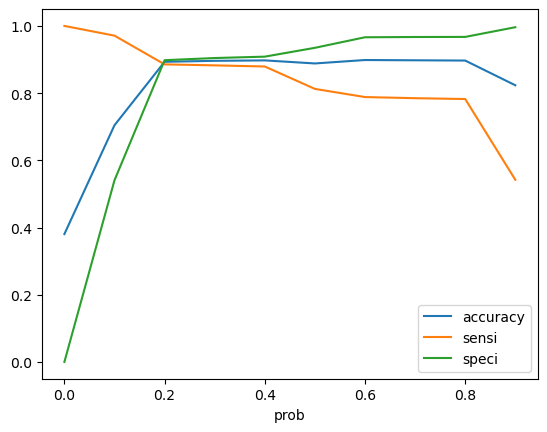

In [176]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [177]:
#### From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.063613,9196,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.063613,4696,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.477938,3274,0,1,1,1,1,1,0,0,0,0,0,1
3,0,0.005640,2164,0,1,0,0,0,0,0,0,0,0,0,0
4,1,0.972850,1667,1,1,1,1,1,1,1,1,1,1,1,1


In [178]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.063613,9196,0,6
1,0,0.063613,4696,0,6
2,0,0.477938,3274,1,48
3,0,0.005640,2164,0,1
4,1,0.972850,1667,1,97


In [179]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted),2)*100

89.0

In [180]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[3486,  396],
       [ 273, 2112]], dtype=int64)

In [181]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [182]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN),2)*100

89.0

In [183]:
# Let us calculate specificity
round(TN / float(TN+FP),2)*100

90.0

Observation:

So as we can see above the model seems to be performing well. The ROC curve has a value of 0.9, which is very good. We have the following values for the Train Data:


Accuracy : 89%

Sensitivity : 89%

Specificity : 90%

Some of the other Stats are derived below, indicating the False Positive Rate, Positive Predictive Value,Negative Predictive Values, Precision & Recall.

In [184]:
# Calculate False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.10200927357032458


In [185]:
# Positive predictive value
print (TP / float(TP+FP))

0.8421052631578947


In [186]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9273743016759777


In [187]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[3486,  396],
       [ 273, 2112]], dtype=int64)

In [188]:
##### Precision
TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.8421052631578947

In [189]:
##### Recall
TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8855345911949686

In [190]:
from sklearn.metrics import precision_score, recall_score

In [191]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.8421052631578947

In [192]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8855345911949686

In [193]:
from sklearn.metrics import precision_recall_curve

In [194]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

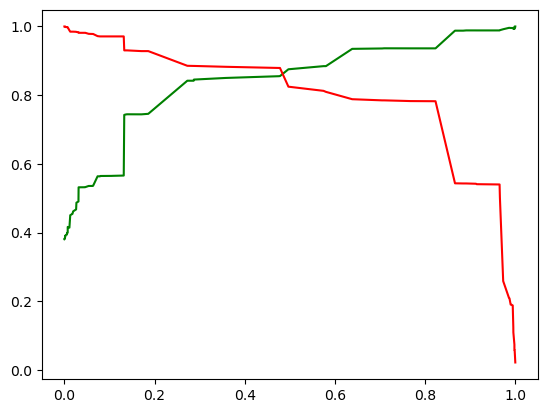

In [195]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [196]:
#scaling test set

num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns

X_test[num_cols] = scaler.fit_transform(X_test[num_cols])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Current occupation_Housewife,Current occupation_Other,Current occupation_Student,Current occupation_Unemployed,Current occupation_Unspecified,Current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,City_Unspecified,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other Tags,Tags_Ringing,Tags_Will revert after reading the email,Country_India,Country_Others,Country_United Arab Emirates,Country_United States,Lead_Quality_High in Relevance,Lead_Quality_Low in Relevance,Lead_Quality_Might be,Lead_Quality_Not Sure,Lead_Quality_Worst,Lead_Profile_Dual Specialization Student,Lead_Profile_Lateral Student,Lead_Profile_Other Leads,Lead_Profile_Potential Lead,Lead_Profile_Student of SomeSchool,Activity_index_01.High,Activity_index_02.Medium,Activity_index_03.Low
7681,0.575687,-0.311318,0.092860,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
984,-0.090676,-0.550262,0.356568,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
8135,-0.423857,0.812462,-0.170849,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6915,0.242505,-0.628665,-0.170849,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2712,-0.090676,-0.421456,0.356568,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


In [198]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2686 entries, 7681 to 1005
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   Lead Origin_Lead Add Form              2686 non-null   int32
 1   Current occupation_Unspecified         2686 non-null   int32
 2   Last Activity_Email Bounced            2686 non-null   int32
 3   Last Activity_Olark Chat Conversation  2686 non-null   int32
 4   Last Notable Activity_SMS Sent         2686 non-null   int32
 5   Tags_Already a student                 2686 non-null   int32
 6   Tags_Closed by Horizzon                2686 non-null   int32
 7   Tags_Interested in other courses       2686 non-null   int32
 8   Tags_Other Tags                        2686 non-null   int32
 9   Tags_Ringing                           2686 non-null   int32
 10  Lead_Quality_High in Relevance         2686 non-null   int32
 11  Activity_index_03.Low           

In [199]:
X_test = X_test[col]
X_test.head()

,Lead Origin_Lead Add Form,Current occupation_Unspecified,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Notable Activity_SMS Sent,Tags_Already a student,Tags_Closed by Horizzon,Tags_Interested in other courses,Tags_Other Tags,Tags_Ringing,Lead_Quality_High in Relevance,Activity_index_03.Low
7681,0,0,0,0,1,0,0,0,0,1,0,0
984,0,0,0,0,0,1,0,0,0,0,0,0
8135,0,1,0,0,1,0,0,0,0,0,0,0
6915,0,0,0,0,0,0,0,0,0,1,0,0
2712,0,0,0,0,0,0,0,0,0,0,0,0


In [201]:
X_test_sm = sm.add_constant(X_test)

##### PREDICTIONS ON TEST SET

In [202]:
y_test_pred = res.predict(X_test_sm)

In [203]:
y_test_pred[:10]

7681    0.063613
984     0.007320
8135    0.477938
6915    0.011120
2712    0.822799
244     0.011120
4698    0.185985
8287    0.031201
6791    0.822799
8970    0.025995
dtype: float64

In [204]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [205]:
# Let's see the head
y_pred_1.head()

,0
7681,0.063613
984,0.007320
8135,0.477938
6915,0.011120
2712,0.822799


In [206]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [207]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [208]:
# Removing index for both dataframes to append them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [209]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [210]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,7681,0.063613
1,0,984,0.007320
2,0,8135,0.477938
3,0,6915,0.011120
4,1,2712,0.822799


In [211]:
# Renaming the column
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [212]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,7681,0.063613
1,0,984,0.007320
2,0,8135,0.477938
3,0,6915,0.011120
4,1,2712,0.822799


In [213]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['Lead_Score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [214]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score
0,7681,0,0.063613,6
1,984,0,0.007320,1
2,8135,0,0.477938,48
3,6915,0,0.011120,1
4,2712,1,0.822799,82


In [215]:
y_pred_final['final_Predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.2 else 0)

In [216]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,Lead_Score,final_Predicted
0,7681,0,0.063613,6,0
1,984,0,0.007320,1,0
2,8135,0,0.477938,48,1
3,6915,0,0.011120,1,0
4,2712,1,0.822799,82,1


In [217]:
# Let's check the overall accuracy.
round(metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted),2)*100

89.0

In [218]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1498,  178],
       [ 123,  887]], dtype=int64)

In [219]:
TP = confusion2[1,1] # true positive
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [220]:
# Let's see the sensitivity of our logistic regression model
round(TP / float(TP+FN),2)*100

88.0

In [221]:
# Let us calculate specificity
round(TN / float(TN+FP),2)*100

89.0

In [222]:
round(precision_score(y_pred_final.Converted , y_pred_final.final_Predicted),2)*100

83.0

In [223]:
round(recall_score(y_pred_final.Converted, y_pred_final.final_Predicted),2)*100

88.0

**Observation**:
    
After running the model on the Test Data these are the figures we obtain:
    

Accuracy : 89%
    
Sensitivity : 88%
    
Specificity : 89%
    
    
**Final Observation:**
    
Let us compare the values obtained for Train & Test:
    

**Train Data:**
    
Accuracy : 89%

Sensitivity : 89%

Specificity : 90%

    
**Test Data: **

Accuracy : 89%
    
Sensitivity : 88%
    
Specificity : 89%
    
The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model

**Recommendations** - Check


To increase our Lead Conversion Rates:


1. Develop strategies to attract high-quality leads from top-performing lead sources.

2. Engage working professionals with tailored messaging.

3. Optimize communication channels based on lead engagement impact.

4. More budget/spend can be done on Welingak Website in terms of advertising, etc.
Incentives/discounts for providing reference that convert to lead, encourage providing more references.

5. Working professionals to be aggressively targeted as they have high conversion rate and will have better financial situation to pay higher fees too.